<a href="https://colab.research.google.com/github/casjunior93/projeto-integrador-iv/blob/main/PI_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas fundamentais

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

#Semente aleatória do Numpy
np.random.seed(42)

In [2]:
pd.options.display.max_rows

60

# URL base da api de dados

In [3]:
url_base = 'https://univesp-analytics.vercel.app/api/get'

# Lendo Json com Pandas

In [4]:
import urllib.request, json 
from pandas.io.json import json_normalize

In [5]:
%%time
fim_iteracao_api = False
pagina = 1
df_dados_api = pd.DataFrame([])

while fim_iteracao_api == False:
  print(f'Início leitura página {pagina}')
  with urllib.request.urlopen(url_base + '?page=' + str(pagina)) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(json_normalize(data))
    if len(data) == 0:
      print(f'Fim. Total de {pagina - 1} páginas.')
      fim_iteracao_api = True
    else:  
      print(f'Fim leitura página {pagina}')
      pagina += 1
      df_dados_api = pd.concat([df_dados_api, df])

Início leitura página 1
Fim leitura página 1
Início leitura página 2
Fim leitura página 2
Início leitura página 3
Fim leitura página 3
Início leitura página 4
Fim leitura página 4
Início leitura página 5
Fim leitura página 5
Início leitura página 6
Fim leitura página 6
Início leitura página 7
Fim leitura página 7
Início leitura página 8
Fim leitura página 8
Início leitura página 9
Fim leitura página 9
Início leitura página 10
Fim leitura página 10
Início leitura página 11
Fim leitura página 11
Início leitura página 12
Fim leitura página 12
Início leitura página 13
Fim leitura página 13
Início leitura página 14
Fim leitura página 14
Início leitura página 15
Fim leitura página 15
Início leitura página 16
Fim leitura página 16
Início leitura página 17
Fim leitura página 17
Início leitura página 18
Fim leitura página 18
Início leitura página 19
Fim leitura página 19
Início leitura página 20
Fim leitura página 20
Início leitura página 21
Fim leitura página 21
Início leitura página 22
Fim le

In [6]:
df_dados_api.shape

(7631, 8)

# Visualizando dados originais

In [7]:
df_dados_api.head()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora
0,641e6aa964307a251eefb092,26.20,58,teste,"25/03/2023, 00:29:45","25/03/2023,",00:29:45
1,641e6a7f64307a251eefb091,26.10,58,teste,"25/03/2023, 00:29:03","25/03/2023,",00:29:03
2,641e6a5564307a251eefb090,26.20,58,teste,"25/03/2023, 00:28:21","25/03/2023,",00:28:21
3,641e6a2a64307a251eefb08f,26.20,59,teste,"25/03/2023, 00:27:38","25/03/2023,",00:27:38
4,641e6a0064307a251eefb08e,26.20,59,teste,"25/03/2023, 00:26:56","25/03/2023,",00:26:56


In [8]:
df_dados_api.tail()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora
5,641dcd6eab1bc5a28516e7ad,27.00,49,teste,"24/03/2023, 13:18:54","24/03/2023,",13:18:54
6,641dcd43ab1bc5a28516e7ac,26.90,49,teste,"24/03/2023, 13:18:11","24/03/2023,",13:18:11
7,641dcd19ab1bc5a28516e7ab,26.90,49,teste,"24/03/2023, 13:17:29","24/03/2023,",13:17:29
8,641dccefab1bc5a28516e7aa,26.80,49,teste,"24/03/2023, 13:16:47","24/03/2023,",13:16:47
9,641dccc5ab1bc5a28516e7a9,26.80,50,teste,"24/03/2023, 13:16:05","24/03/2023,",13:16:05


In [25]:
df_dados_api.isnull().sum()

_id                0
temp_ar            3
umid_ar            3
type               1
time.time_js       1
time.data          1
time.hora          1
teste           7630
dtype: int64

In [26]:
del df_dados_api['teste']
del df_dados_api['_id']
del df_dados_api['type']
df_dados_api.head()

,temp_ar,umid_ar,time.time_js,time.data,time.hora
0,26.20,58,"25/03/2023, 00:30:27","25/03/2023,",00:30:27
1,26.20,58,"25/03/2023, 00:29:45","25/03/2023,",00:29:45
2,26.10,58,"25/03/2023, 00:29:03","25/03/2023,",00:29:03
3,26.20,58,"25/03/2023, 00:28:21","25/03/2023,",00:28:21
4,26.20,59,"25/03/2023, 00:27:38","25/03/2023,",00:27:38


# Tratando data

In [84]:
dados_projeto = df_dados_api.copy()

In [85]:
dados_projeto['data'] = dados_projeto['time.data'].str.replace(',','') + ' ' + dados_projeto['time.hora']
dados_projeto['data'] = dados_projeto['data'].astype('datetime64[ns]')
dados_projeto.head()

,temp_ar,umid_ar,time.time_js,time.data,time.hora,data
0,26.20,58,"25/03/2023, 00:30:27","25/03/2023,",00:30:27,2023-03-25 00:30:27
1,26.20,58,"25/03/2023, 00:29:45","25/03/2023,",00:29:45,2023-03-25 00:29:45
2,26.10,58,"25/03/2023, 00:29:03","25/03/2023,",00:29:03,2023-03-25 00:29:03
3,26.20,58,"25/03/2023, 00:28:21","25/03/2023,",00:28:21,2023-03-25 00:28:21
4,26.20,59,"25/03/2023, 00:27:38","25/03/2023,",00:27:38,2023-03-25 00:27:38


In [86]:
dados_projeto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7631 entries, 0 to 0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   temp_ar       7628 non-null   object        
 1   umid_ar       7628 non-null   object        
 2   time.time_js  7630 non-null   object        
 3   time.data     7630 non-null   object        
 4   time.hora     7630 non-null   object        
 5   data          7630 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 417.3+ KB


In [87]:
del dados_projeto['time.time_js']
del dados_projeto['time.data']
del dados_projeto['time.hora']

In [88]:
dados_projeto.head()

,temp_ar,umid_ar,data
0,26.20,58,2023-03-25 00:30:27
1,26.20,58,2023-03-25 00:29:45
2,26.10,58,2023-03-25 00:29:03
3,26.20,58,2023-03-25 00:28:21
4,26.20,59,2023-03-25 00:27:38


In [105]:
filtro = ((dados_projeto.data >= '2023-03-14') & (dados_projeto.data <= '2023-03-25'))
serie = dados_projeto.loc[filtro]
serie.reset_index(inplace=True, drop=True)
serie

,temp_ar,umid_ar,data
0,26.20,58,2023-03-24 23:59:34
1,26.20,58,2023-03-24 23:58:52
2,26.20,58,2023-03-24 23:58:10
3,26.20,58,2023-03-24 23:57:28
4,26.20,58,2023-03-24 23:56:46
...,...,...,...
4225,25.80,63,2023-03-14 00:22:13
4226,25.80,63,2023-03-14 00:17:11
4227,25.80,63,2023-03-14 00:12:09
4228,25.80,63,2023-03-14 00:07:07


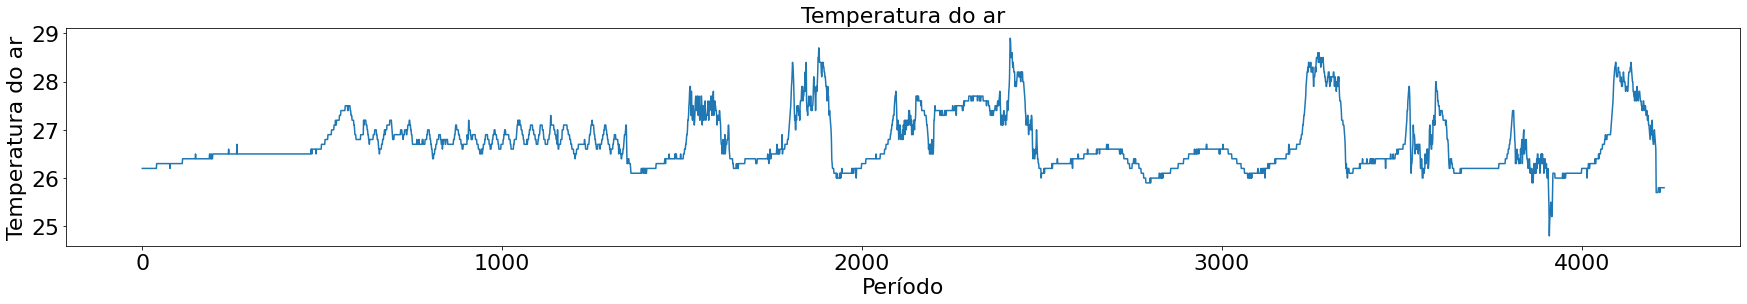

In [106]:
plt.figure(figsize=(30,4))
serie.temp_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Temperatura do ar',size=22)
plt.title('Temperatura do ar',size=22)

plt.show()

# Criando dados a cada 1 minuto utilizando a média

In [107]:
serie.set_index('data', inplace=True)

In [108]:
serie

,temp_ar,umid_ar
data,,
2023-03-24 23:59:34,26.20,58
2023-03-24 23:58:52,26.20,58
2023-03-24 23:58:10,26.20,58
2023-03-24 23:57:28,26.20,58
2023-03-24 23:56:46,26.20,58
...,...,...
2023-03-14 00:22:13,25.80,63
2023-03-14 00:17:11,25.80,63
2023-03-14 00:12:09,25.80,63


In [134]:
%%time
dados_agrupados_minutos = serie.resample('1T').mean()
dados_agrupados_minutos.head()

CPU times: user 2.58 s, sys: 15.4 ms, total: 2.59 s
Wall time: 2.61 s


,temp_ar,umid_ar
data,,
2023-03-14 00:02:00,25.80,63.00
2023-03-14 00:03:00,NaN,NaN
2023-03-14 00:04:00,NaN,NaN
2023-03-14 00:05:00,NaN,NaN
2023-03-14 00:06:00,NaN,NaN


In [135]:
dados_agrupados_minutos.isnull().sum()

temp_ar    12010
umid_ar    12010
dtype: int64

In [139]:
print(f'Nosso conjunto tem {dados_agrupados_minutos.shape[0]} elementos, mas {dados_agrupados_minutos.temp_ar.isnull().sum()} são nulos. Não vou usar o resample com 1 minuto.')

Nosso conjunto tem 15838 elementos, mas 12010 são nulos. Não vou usar o resample com 1 minuto.


Melhor continuar com a serie obtida originalmente, por enquanto.

# Gráficos

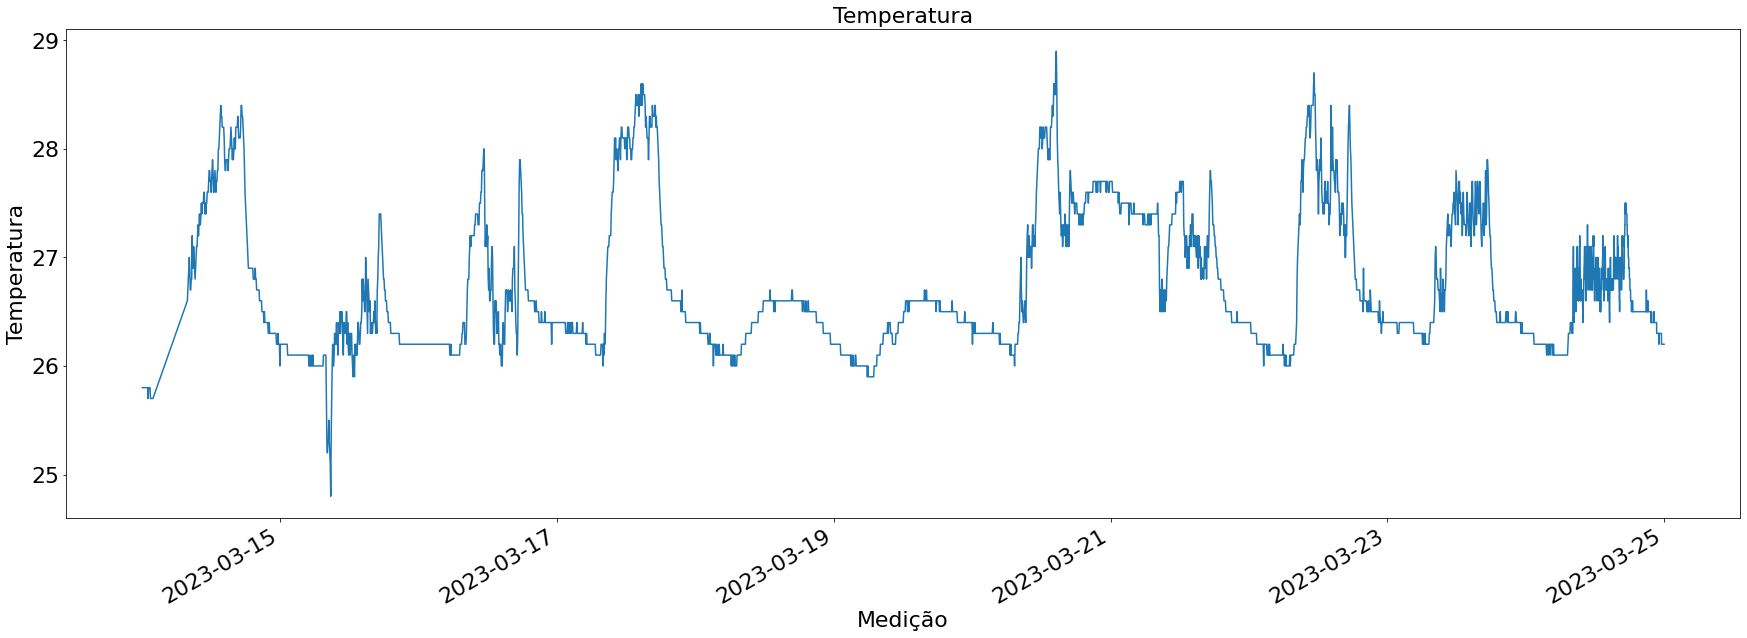

CPU times: user 525 ms, sys: 36.7 ms, total: 561 ms
Wall time: 631 ms


In [123]:
%%time
plt.figure(figsize=(30,10))
serie['temp_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=22)
plt.ylabel('Temperatura',size=22)
plt.title('Temperatura',size=22)

plt.show()

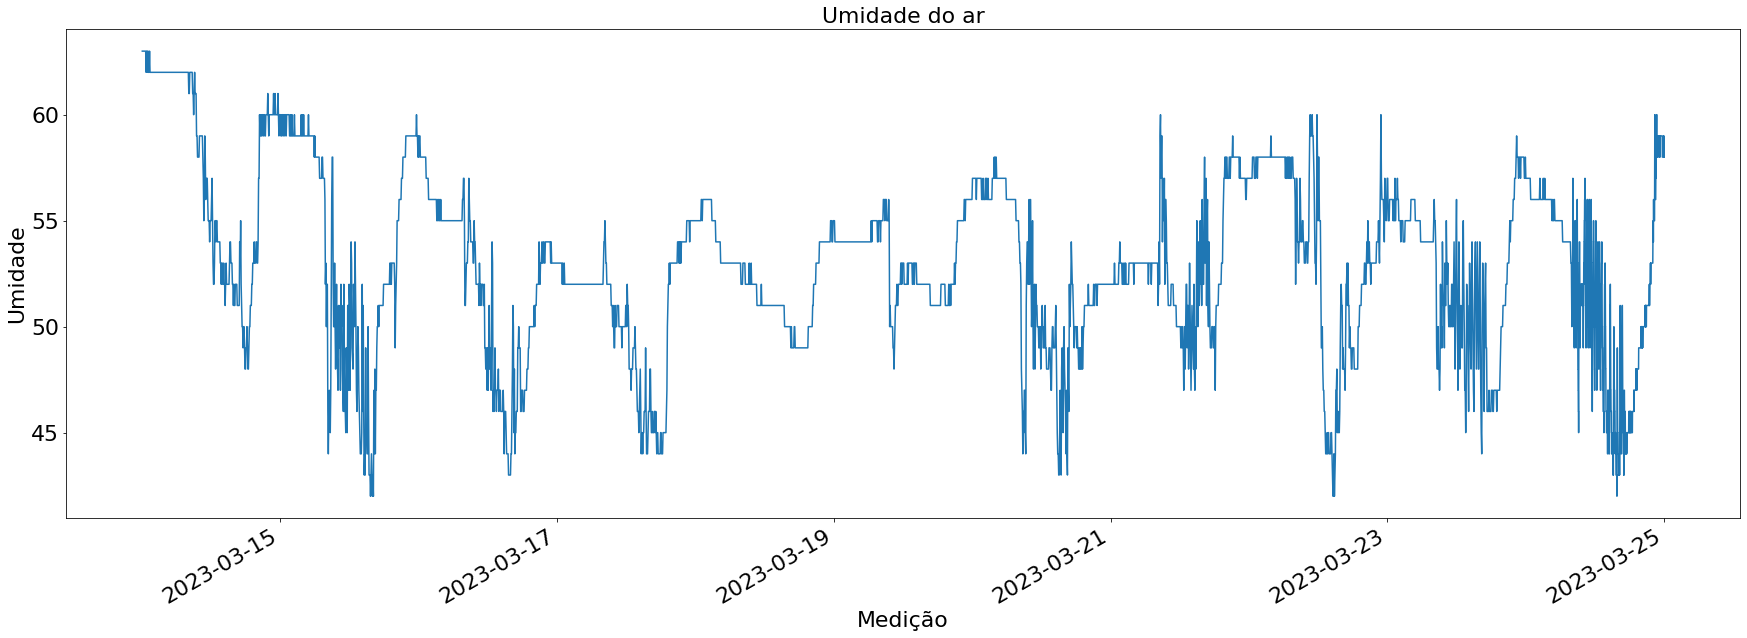

CPU times: user 371 ms, sys: 107 ms, total: 477 ms
Wall time: 367 ms


In [124]:
%%time
plt.figure(figsize=(30,10))
serie['umid_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=22)
plt.ylabel('Umidade',size=22)
plt.title('Umidade do ar',size=22)

plt.show()